In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.font_manager as fm
import matplotlib
import timeit
import feather
import statsmodels as stm
import autotime
%matplotlib inline
%load_ext autotime
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression as LinR
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split

C:\CS\Anaconda\envs\DublinBus\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


First the

In [2]:
res = pd.read_csv('model_results_outliers_cut.csv')
res.shape[0]

5544

time: 14 ms


In [3]:
res = res.drop_duplicates()
res.shape[0]

5544

time: 7 ms


In [4]:
res.sort_values(['MdAPE', 'MAPE', 'R-squared'], inplace=True)
res

,SSID,R-squared,MAPE,MdAPE,Row_Count,Outlier%_Cut,JPID_Count
1299,49031887,1.000000,0.000282,0.000048,5,0.000000,1
2936,176312,1.000000,0.000150,0.000107,5,0.000000,1
4467,49620264,1.000000,0.001073,0.000160,5,0.000000,1
3166,3750359,1.000000,0.000288,0.000219,5,0.000000,1
2634,44224199,0.999904,0.112067,0.000245,11,0.000000,4
749,43064309,1.000000,0.001037,0.000330,5,16.666667,1
3866,4353187,1.000000,0.000435,0.000442,5,0.000000,1
2284,60194650,1.000000,0.000417,0.000477,7,0.000000,1
372,32703271,1.000000,0.000707,0.000658,8,20.000000,1
4372,60873620,1.000000,0.001181,0.000665,7,22.222222,1


time: 29 ms


In [5]:
print ("Average MdAPE is", res.MdAPE.mean())
print ("Average MAPE is", res.MAPE.mean())
print ("Average R-squared value is", res['R-squared'].mean())

Average MdAPE is 19.2966324564
Average MAPE is 22.1413533463
Average R-squared value is 0.310331628783
time: 5 ms


In [6]:
res['Underreported'] = res['Row_Count'] < 25
res = res[res.Underreported != True]
res = res.drop(['Underreported'], axis=1)
res.reset_index(inplace=True)
res = res.drop('index', axis=1)
res

,SSID,R-squared,MAPE,MdAPE,Row_Count,Outlier%_Cut,JPID_Count
0,73136164,0.940797,0.353195,0.086229,26,31.578947,1
1,12327358,0.999511,0.350954,0.093880,28,0.000000,4
2,34413443,0.995057,0.256456,0.190624,28,20.000000,1
3,21787354,0.986756,0.437849,0.211925,26,3.703704,1
4,72617259,0.904116,0.563495,0.234632,51,35.443038,1
5,34143415,0.941918,0.475990,0.285457,27,3.571429,1
6,34153416,0.991580,0.548090,0.326963,26,18.750000,3
7,42257462,0.716745,0.537552,0.372340,133,41.921397,3
8,50223461,0.974193,0.716191,0.434306,34,0.000000,1
9,43754366,0.999429,0.501820,0.443866,28,3.448276,2


time: 29 ms


In [7]:
print ("Average MdAPE is", res.MdAPE.mean())
print ("Average MAPE is", res.MAPE.mean())
print ("Average R-squared value is", res['R-squared'].mean())

Average MdAPE is 19.5974056757
Average MAPE is 22.470124227
Average R-squared value is 0.300248467493
time: 2 ms


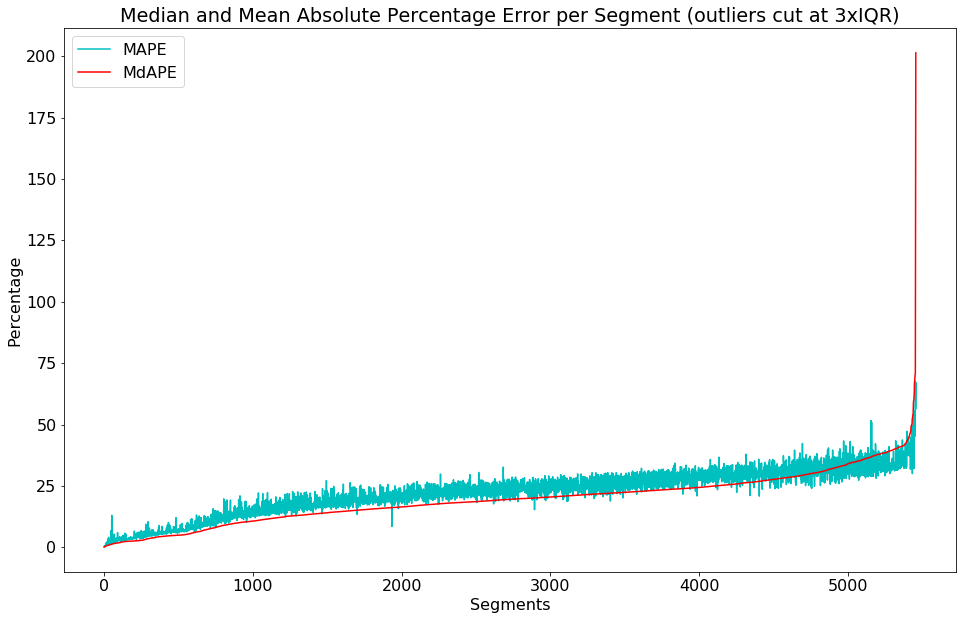

time: 211 ms


In [24]:
fig = plt.figure(figsize=(16,10))
plt.rc('font', size=16)
ax = fig.add_subplot(111)

ax.plot(res.MAPE, label='MAPE', color='c')
ax.plot(res.MdAPE, label='MdAPE', color='r')

ax.set_title('Median and Mean Absolute Percentage Error per Segment (outliers cut at 3xIQR)')
ax.legend(loc='upper left')
ax.set_ylabel('Percentage')
ax.set_xlabel('Segments')

In [9]:
res1 = pd.read_csv('model_results_no_outliers_cut.csv')
res1.shape[0]

5546

time: 11 ms


In [10]:
res1 = res1.drop_duplicates()
res1.shape[0]

5546

time: 4 ms


In [11]:
res1.sort_values(['MdAPE', 'MAPE', 'R-squared'], inplace=True)
res1

,SSID,R-squared,MAPE,MdAPE,Row_Count,JPID_Count
1299,49031887,1.000000,0.000282,0.000048,5,1
2936,176312,1.000000,0.000150,0.000107,5,1
4202,32943295,0.702602,1.990142,0.000133,10,1
4468,49620264,1.000000,0.001073,0.000160,5,1
3166,3750359,1.000000,0.000288,0.000219,5,1
5466,13580350,1.000000,0.000404,0.000242,5,2
2634,44224199,0.999904,0.112067,0.000245,11,4
3867,4353187,1.000000,0.000435,0.000442,5,1
2284,60194650,1.000000,0.000417,0.000477,7,1
3750,43217342,1.000000,0.000732,0.000705,6,1


time: 29 ms


In [12]:
print ("Average MdAPE is", res1.MdAPE.mean())
print ("Average MAPE is", res1.MAPE.mean())
print ("Average R-squared value is", res1['R-squared'].mean())

Average MdAPE is 20.3810317008
Average MAPE is 24.8279843782
Average R-squared value is 0.287490619336
time: 4 ms


In [14]:
res1['Underreported'] = res1['Row_Count'] < 25
res1 = res1[res1.Underreported != True]
res1 = res1.drop(['Underreported'], axis=1)
res1.reset_index(inplace=True)
res1 = res1.drop('index', axis=1)
res1

,SSID,R-squared,MAPE,MdAPE,Row_Count,JPID_Count
0,12327358,0.999626,0.324500,0.084723,28,4
1,21762177,0.953112,1.293271,0.205381,25,1
2,34143415,0.994899,0.443881,0.284874,28,1
3,21787354,0.998120,0.500915,0.326187,27,1
4,34413443,0.872983,3.281277,0.368546,35,1
5,50223461,0.974193,0.716191,0.434306,34,1
6,34473454,0.766318,1.493719,0.475254,36,1
7,34555022,0.854843,1.585469,0.526987,35,1
8,28402845,0.704050,4.147685,0.609534,25,1
9,32044568,0.911195,2.096418,0.631338,31,1


time: 28 ms


In [15]:
print ("Average MdAPE is", res1.MdAPE.mean())
print ("Average MAPE is", res1.MAPE.mean())
print ("Average R-squared value is", res1['R-squared'].mean())

Average MdAPE is 20.6905140699
Average MAPE is 25.1892680976
Average R-squared value is 0.277186867812
time: 3 ms


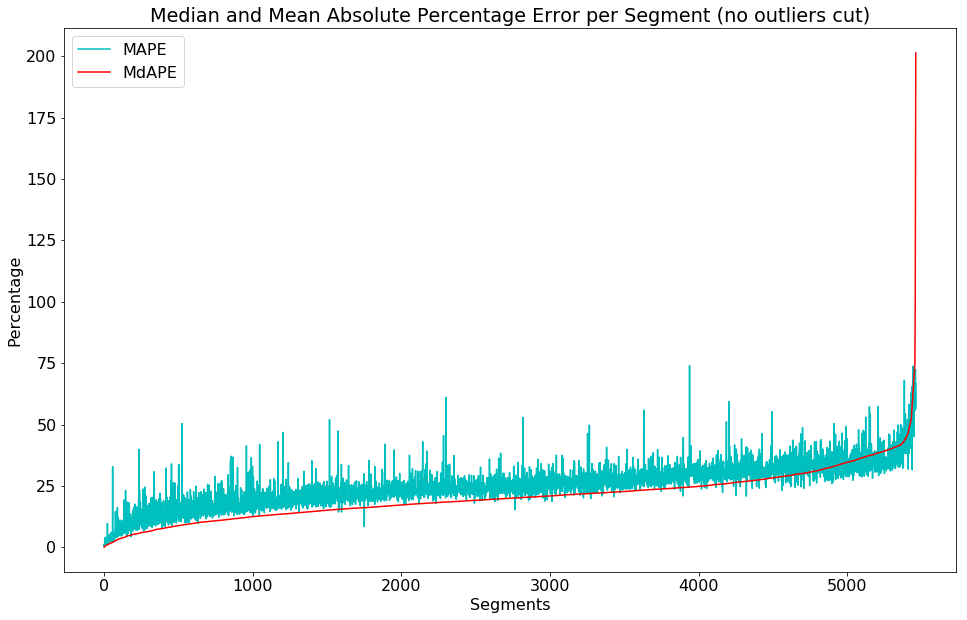

time: 225 ms


In [25]:
fig1 = plt.figure(figsize=(16,10))
plt.rc('font', size=16)
ax1 = fig1.add_subplot(111)

ax1.plot(res1.MAPE, label='MAPE', color='c')
ax1.plot(res1.MdAPE, label='MdAPE', color='r')

ax1.set_title('Median and Mean Absolute Percentage Error per Segment (no outliers cut)')
ax1.legend(loc='upper left')
ax1.set_ylabel('Percentage')
ax1.set_xlabel('Segments')